#Problem Statement:
Delhivery, India's largest and fastest-growing fully integrated logistics company, seeks to leverage its vast data resources to enhance operational efficiency, improve decision-making, and drive profitability. The company has vast amounts of raw data emerging from its data engineering pipelines, but transforming this raw data into actionable insights remains a challenge. As a Data Scientist the goal is to process raw data to remove inconsistencies, handle missing values, and prepare it for analysis. Extract meaningful features from the raw data that can be used by the Data Science team for forecasting models.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from IPython.display import Image; Image(url='https://finshiksha.com/wp-content/uploads/2022/05/Delhivery-Banner-Image.jpg')

In [5]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
To: /content/delhivery_data.csv?1642751181
100% 55.6M/55.6M [00:02<00:00, 24.7MB/s]


In [6]:
data = pd.read_csv('delhivery_data.csv?1642751181')

In [7]:
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [8]:
data.shape

(144867, 24)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [10]:
data.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [11]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [13]:
data['Segment_Key'] = data['trip_uuid'] + data['source_center'] + data['destination_center']

Removing NULL Values





In [14]:
data = data.dropna(how='any')
data = data.reset_index(drop=True)

In [15]:
data['od_end_time'] = pd.to_datetime(data['od_end_time'], errors='coerce')
data['od_start_time'] = pd.to_datetime(data['od_start_time'], errors='coerce')

In [16]:
data.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,Segment_Key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB


In [17]:
data['od_start_time'].isna().sum()

0

In [18]:
data['od_end_time'].isna().sum()

0

In [19]:
data['source_name'].value_counts()

,count
source_name,
Gurgaon_Bilaspur_HB (Haryana),23267
Bangalore_Nelmngla_H (Karnataka),9975
Bhiwandi_Mankoli_HB (Maharashtra),9088
Pune_Tathawde_H (Maharashtra),4061
Hyderabad_Shamshbd_H (Telangana),3340
...,...
Badkulla_Central_DPP_1 (West Bengal),1
Mahasamund_RajpurRD_D (Chhattisgarh),1
Tiruchi_Samyaprm_D (Tamil Nadu),1


In [20]:
data['destination_name'].value_counts()

,count
destination_name,
Gurgaon_Bilaspur_HB (Haryana),15192
Bangalore_Nelmngla_H (Karnataka),11019
Bhiwandi_Mankoli_HB (Maharashtra),5492
Hyderabad_Shamshbd_H (Telangana),5142
Kolkata_Dankuni_HB (West Bengal),4892
...,...
Durg_Bhilai_DC (Chhattisgarh),1
Bhadohi_Rajpura_D (Uttar Pradesh),1
Vijayawada (Andhra Pradesh),1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  object        
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [22]:
segment_cols = ['segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

for col in segment_cols:
  data[col + '_sum'] = data.groupby('Segment_Key')[col].cumsum()

data[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.9653
1,24.0,20.0,21.7243
2,40.0,27.0,32.5395
3,61.0,39.0,45.5619
4,67.0,44.0,49.4772
...,...,...,...
144311,92.0,94.0,65.3487
144312,118.0,115.0,82.7212
144313,138.0,149.0,103.4265
144314,155.0,176.0,122.3150


In [23]:
create_segment_dict = {
    'data' : 'first',
    'trip_uuid' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',


    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',

    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
}


# Group the data by Segment_Key and apply the aggregation dictionary



In [24]:
segment = data.groupby('Segment_Key').agg(create_segment_dict)

In [25]:
segment

,data,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
Segment_Key,,,,,,,,,,,,,,,,,,,
trip-153671041653548748IND209304AAAIND000000ACB,training,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
trip-153671041653548748IND462022AAAIND209304AAA,training,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
trip-153671042288605164IND561203AABIND562101AAA,training,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
trip-153671042288605164IND572101AAAIND561203AAB,training,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
trip-153671043369099517IND000000ACBIND160002AAC,training,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trip-153861115439069069IND628204AAAIND627657AAA,test,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
trip-153861115439069069IND628613AAAIND627005AAA,test,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
trip-153861115439069069IND628801AAAIND628204AAA,test,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184


In [26]:
segment = segment.sort_values(by=['Segment_Key', 'od_end_time'],ascending = True).reset_index()

In [27]:
segment.drop(segment['od_start_time'].isna().sum(),inplace=True)

In [28]:
segment

,Segment_Key,data,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
1,trip-153671041653548748IND462022AAAIND209304AAA,training,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164IND561203AABIND562101AAA,training,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164IND572101AAAIND561203AAB,training,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517IND000000ACBIND160002AAC,training,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
5,trip-153671043369099517IND562132AAAIND000000ACB,training,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069IND628204AAAIND627657AAA,test,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26218,trip-153861115439069069IND628613AAAIND627005AAA,test,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26219,trip-153861115439069069IND628801AAAIND628204AAA,test,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26220,trip-153861118270144424IND583119AAAIND583101AAA,test,trip-153861118270144424,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [29]:
segment[segment['trip_uuid'] == 'trip-153671042288605164']

,Segment_Key,data,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
2,trip-153671042288605164IND561203AABIND562101AAA,training,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164IND572101AAAIND561203AAB,training,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899


In [30]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26221 entries, 1 to 26221
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Segment_Key                     26221 non-null  object        
 1   data                            26221 non-null  object        
 2   trip_uuid                       26221 non-null  object        
 3   trip_creation_time              26221 non-null  object        
 4   route_schedule_uuid             26221 non-null  object        
 5   route_type                      26221 non-null  object        
 6   source_center                   26221 non-null  object        
 7   source_name                     26221 non-null  object        
 8   destination_center              26221 non-null  object        
 9   destination_name                26221 non-null  object        
 10  od_start_time                   26221 non-null  datetime64[ns]
 11  od

#Calculate the time difference in hours between od_start_time and od_end_time

In [31]:
segment['od_diff_hours'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() / (60)
segment['od_diff_hours']

,od_diff_hours
1,999.505379
2,58.832388
3,122.779486
4,834.638929
5,3099.723591
...,...
26217,62.115193
26218,91.087797
26219,44.174403
26220,287.474007


In [32]:
segment

,Segment_Key,data,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_diff_hours
1,trip-153671041653548748IND462022AAAIND209304AAA,training,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.505379
2,trip-153671042288605164IND561203AABIND562101AAA,training,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.832388
3,trip-153671042288605164IND572101AAAIND561203AAB,training,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.779486
4,trip-153671043369099517IND000000ACBIND160002AAC,training,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,834.638929
5,trip-153671043369099517IND562132AAAIND000000ACB,training,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270,3099.723591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069IND628204AAAIND627657AAA,test,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),...,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,62.115193
26218,trip-153861115439069069IND628613AAAIND627005AAA,test,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),...,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,91.087797
26219,trip-153861115439069069IND628801AAAIND628204AAA,test,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),...,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,44.174403
26220,trip-153861118270144424IND583119AAAIND583101AAA,test,trip-153861118270144424,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),...,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,287.474007


#Creating trip dictionary to analyse trip wise data

In [33]:
create_trip_dict = {
    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_diff_hours' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

    }

In [34]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)

In [35]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_diff_hours,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999.0,999.505379,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


In [36]:
trip[['actual_time','segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,830.0,820.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14782,83.0,82.0
14783,21.0,21.0
14784,282.0,281.0
14785,264.0,258.0


In [37]:
sorted_trip = trip.sort_values(by=['actual_time', 'segment_actual_time_sum'], ascending=False)
sorted_trip[['actual_time', 'segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
13310,6265.0,6230.0
10975,5804.0,5768.0
11581,5465.0,5427.0
13719,5067.0,5032.0
9587,5064.0,5028.0
...,...,...
8955,10.0,10.0
10909,10.0,10.0
14388,10.0,10.0
11031,9.0,9.0


In [38]:
trip[trip['trip_uuid']=='trip-153671042288605164']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_diff_hours,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.111,141.0,84.1894,65.0


In [39]:
trip['route_type'].value_counts().reset_index()

,route_type,count
0,Carting,8906
1,FTL,5881


In [40]:
trip[['segment_actual_time_sum','od_diff_hours']]

,segment_actual_time_sum,od_diff_hours
0,820.0,999.505379
1,141.0,181.611874
2,3308.0,3934.362520
3,59.0,100.494935
4,340.0,718.349042
...,...,...
14782,82.0,258.028928
14783,21.0,60.590521
14784,281.0,422.119867
14785,258.0,348.512862


In [41]:
trip['Actual_diff_hours'] =  trip['segment_actual_time_sum'] - trip['actual_time']/ (60)

In [42]:
trip['Actual_diff_hours']

,Actual_diff_hours
0,806.166667
1,138.616667
2,3252.216667
3,58.016667
4,334.316667
...,...
14782,80.616667
14783,20.650000
14784,276.300000
14785,253.600000


In [43]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_diff_hours,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,Actual_diff_hours
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),999.0,999.505379,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,806.166667
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,138.616667
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,3252.216667
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,58.016667
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,334.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0,80.616667
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0,20.650000
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0,276.300000
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0,253.600000


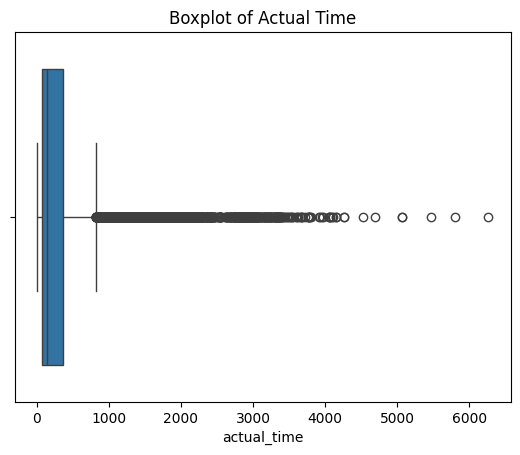

In [44]:
# Visualize actual_time outliers
sns.boxplot(x=trip['actual_time'])
plt.title("Boxplot of Actual Time")
plt.show()

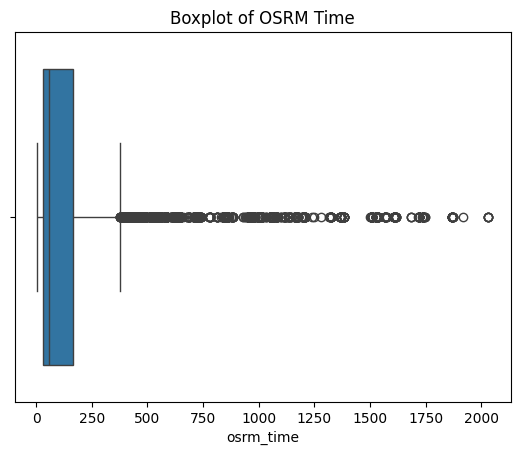

In [45]:
# Visualize osrm_time outliers
sns.boxplot(x=trip['osrm_time'])
plt.title("Boxplot of OSRM Time")
plt.show()

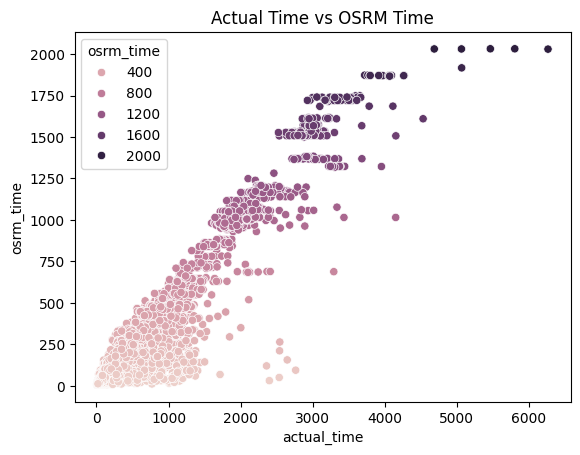

In [46]:
# Visualize actual_time vs osrm_time
sns.scatterplot(x='actual_time', y='osrm_time', data=trip,hue='osrm_time')
plt.title("Actual Time vs OSRM Time")
plt.show()

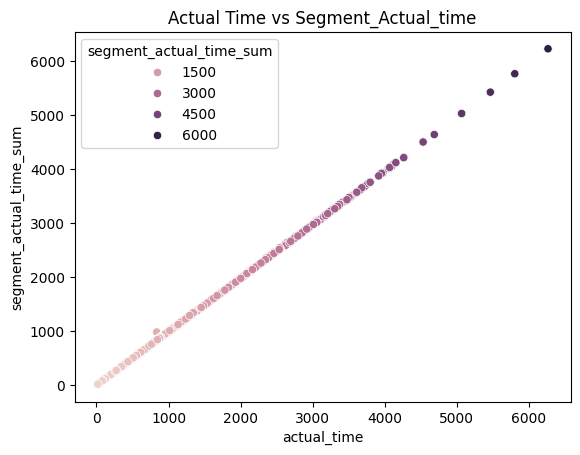

In [47]:
# Visualize actual_time vs Segment_Actual_time
sns.scatterplot(x='actual_time', y='segment_actual_time_sum', data=trip,hue='segment_actual_time_sum')
plt.title("Actual Time vs Segment_Actual_time")
plt.show()

#Hypothesis Testing

actual_time aggregated value and OSRM time aggregated value.

In [48]:
from scipy.stats import ttest_ind, ttest_rel
sampled_data = trip.sample(n=1000, random_state=42)
ttest,pval = ttest_rel(sampled_data['actual_time'],sampled_data['osrm_time'])
print("p-value",pval)
print("ttest values is ",ttest)
if pval<0.05:
  print("Reject null hypothesis")
  print("There is a very significant difference between actual time and osrm time")
else:
  print("Accept null hypothesis")
  print("There is a no difference between actual time and osrm time")

p-value 1.3383994234508476e-77
ttest values is  20.39932877587499
Reject null hypothesis
There is a very significant difference between actual time and osrm time


actual_time aggregated value and segment actual time aggregated
value.

In [49]:
sampled_test_data = trip.sample(n=1000, random_state=42)
ttest,pval = ttest_rel(sampled_test_data['actual_time'],sampled_test_data['segment_actual_time_sum'])
print("p-value",pval)
print("ttest values is ",ttest)
if pval<0.05:
  print("Reject null hypothesis")
  print("There is a very significant difference in between actual time and segement actual time")
else:
  print("Accept null hypothesis")
  print("There is no difference in between actual time and segement actual time")

p-value 8.70001488415075e-64
ttest values is  18.139996665565782
Reject null hypothesis
There is a very significant difference in between actual time and segement actual time


In [50]:
trip[['actual_time','osrm_time']]

,actual_time,osrm_time
0,830.0,388.0
1,143.0,68.0
2,3347.0,1740.0
3,59.0,15.0
4,341.0,117.0
...,...,...
14782,83.0,62.0
14783,21.0,12.0
14784,282.0,48.0
14785,264.0,179.0


OSRM Distance Vs Segment OSRM Distance Hypothesis Testing

In [51]:
sampled_osrm_data = trip.sample(n=1000, random_state=42)
ttest,pval = ttest_rel(sampled_osrm_data['osrm_distance'],sampled_osrm_data['segment_osrm_distance_sum'])
print("p-value",pval)
print("ttest values is ",ttest)
if pval<0.05:
  print("Reject null hypothesis")
  print("There is a very significant difference in between osrm_distance and segment_osrm_distance")
else:
  print("Accept null hypothesis")
  print("There is no difference in between osrm_distance and segement actual segment_osrm_distance")

p-value 5.847131042782954e-21
ttest values is  -9.60644881028483
Reject null hypothesis
There is a very significant difference in between osrm_distance and segment_osrm_distance


In [52]:
trip[['osrm_distance','segment_osrm_distance_sum']]

,osrm_distance,segment_osrm_distance_sum
0,544.8027,649.8528
1,85.1110,84.1894
2,2354.0665,2545.2678
3,19.6800,19.8766
4,146.7918,146.7919
...,...,...
14782,73.4630,64.8551
14783,16.0882,16.0883
14784,58.9037,104.8866
14785,171.1103,223.5324


OSRM Time Vs Segment OSRM Time Hypothesis Testing

In [53]:
sampled_time_data = trip.sample(n=1000, random_state=42)
ttest,pval = ttest_rel(sampled_time_data['osrm_time'],sampled_time_data['segment_osrm_time_sum'])
print("p-value",pval)
print("ttest values is ",ttest)
if pval<0.05:
  print("Reject null hypothesis")
  print("There is a very significant difference in between osrm_time and segment_osrm_time")
else:
  print("Accept null hypothesis")
  print("There is no difference in between osrm_time and segement actual segment_osrm_time")

p-value 4.117974334732554e-28
ttest values is  -11.337241440786084
Reject null hypothesis
There is a very significant difference in between osrm_time and segment_osrm_time


In [54]:
trip[['osrm_time','segment_osrm_time_sum']]

,osrm_time,segment_osrm_time_sum
0,388.0,474.0
1,68.0,65.0
2,1740.0,1941.0
3,15.0,16.0
4,117.0,115.0
...,...,...
14782,62.0,62.0
14783,12.0,11.0
14784,48.0,88.0
14785,179.0,221.0



Extracting City, State and Code from Destination Place

In [55]:
def extractState(name):
  state = name.split('(')[1]
  return state[:-1]

In [56]:
def extractCity(name):
  city = name.split(' (')[0]
  city = city.split('_')[0]

  if city == 'pnq vadgaon sheri dpc':
      return 'vadgaonsheri'

    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC',
    #  'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']

  if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

  if city == 'hbr layout pc' : return 'bengaluru'
  if city == 'bhopal mp nagar' : return 'bhopal'
  if city == 'mumbai antop hill' : return 'mumbai'

  return city

In [57]:
def extractCode(x):
    # We will remove state
    x = x.split(' (')[0]

    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]

    return 'none'

In [58]:
trip['destination_state'] = trip['destination_name'].apply(lambda name: extractState(name))
trip['destination_city']  = trip['destination_name'].apply(lambda name: extractCity(name))
trip['destination_code']  = trip['destination_name'].apply(lambda x: extractCode(x))

In [60]:
trip[['destination_state', 'destination_city', 'destination_code']]

,destination_state,destination_city,destination_code
0,Uttar Pradesh,Kanpur,6
1,Karnataka,Doddablpur,D
2,Haryana,Gurgaon,HB
3,Maharashtra,Mumbai,IP
4,Karnataka,Sandur,D
...,...,...,...
14782,Punjab,Chandigarh,H
14783,Haryana,Faridabad,DC
14784,Uttar Pradesh,Kanpur,DC
14785,Tamil Nadu,Tirchchndr,D


#Extract Month from od_end_time

In [67]:


# Ensure 'od_end_time' is in datetime format
trip['od_end_time'] = pd.to_datetime(data['od_end_time'], errors='coerce')
trip['month'] = trip['od_end_time'].dt.month


In [68]:
# Calculate the time deviation between actual and predicted time (osrm_time)
trip['time_deviation'] = trip['actual_time'] - trip['osrm_time']


In [69]:
# Group the data by 'month' and calculate the mean deviation for each month
monthly_deviation = trip.groupby('month')['time_deviation'].mean().reset_index()

# Rename columns for better understanding
monthly_deviation.columns = ['Month', 'Average_Time_Deviation']


In [70]:
# Sort by deviation to find months with the highest/lowest deviation
monthly_deviation_sorted = monthly_deviation.sort_values(by='Average_Time_Deviation', ascending=False)

monthly_deviation_sorted


,Month,Average_Time_Deviation
1,10,196.278152
0,9,195.112040


#Insights and Recommendations:

Insights & Recommendations:


*   Months with High Deviation: If certain months show much higher positive
deviation, it indicates that actual trip times were consistently longer than predicted (e.g., due to seasonal traffic, poor weather, or increased demand).
*  Action: Delhivery could analyze the reasons for these deviations (e.g.,
heavy rains, festivals, or increased shipment volumes) and adjust OSRM time predictions or route planning for these months.
*   Months with Low or Negative Deviation: If certain months show negative deviation, this means trips were completed faster than predicted, indicating potential efficiency gains during those months.
*   Action: Delhivery can study these months to understand the factors contributing to faster deliveries (e.g., clear weather, less traffic) and leverage these insights to replicate the success in other months.
Seasonal Trends: By looking at the trend across all months, Delhivery can identify seasonal patterns. For example:
*   Monsoon Season: If delays are more significant in certain months (e.g., July to September, in India, due to monsoons), they can preemptively prepare by planning alternate routes or allocating additional resources during these months.
*   Festive Periods: Delays might spike around major festivals (e.g., Diwali, Christmas), so increasing operational capacity or adjusting cutoff times might help.


